# CS247 Advanced Data Mining - Assignment 1
## Deadline: 11:59PM, January 24, 2023

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Submission Requirements

* Submit your solutions through GradeScope in BruinLearn.
* Late submissions are allowed up to 24 hours post-deadline with a penalty factor of $\mathbf{1}(t\leq24)e^{-(\ln(2)/12)t}$.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Outline
* Problem 1: Naïve Bayes (50 points)
* Problem 2: Logistic Regression (50 points)
* Problem 3: Gaussian Mixture Models (70 points + 10 bonus points)

## Problem 1: Naïve Bayes (50 points) <a class="anchor" id="problem-1"></a>

### Exercise 1.1: MLE Estimation of Model Parameters (10 points)

Recall that given a corpus and labels for each document $D = \{(\boldsymbol{x}_d, y_d)\}_{d=1}^{|D|}$, the log likelihood function of a Bayes model parameterized by $\Theta = (\boldsymbol\beta_1, \boldsymbol\beta_2, \boldsymbol\beta_3, \boldsymbol\pi)$ is:
$$
\begin{align}
\mathcal{L}(\Theta) & = \log \prod_{d=1}^{|D|} p(\boldsymbol{x}_d, y_d | \Theta) \\
& = \sum_{d=1}^{|D|} \log p(\boldsymbol{x}_d, y_d | \Theta) \\
& = \sum_{d=1}^{|D|} \log [p(\boldsymbol{x}_d | y_d, \Theta) p(y_d | \Theta)] \\
& = \sum_{d=1}^{|D|} \left(\sum_{n=1}^{N}x_{dn}\log\beta_{y_d,n} + \log \pi_{y_d}\right).
\end{align}
$$
Show the MLE estimator of $\boldsymbol\beta$. Include necessary derivatives in your answer. (Hint: use Lagrange multipliers to enforce the constraint $\sum_{n=1}^{N}\beta_{j,n} = 1$ for all $j$.)

Since we are interested in the MLE of $\boldsymbol\beta$, we can focus on the following reduction of the log likelihood function: $\mathcal{L}(\beta) = \sum_{d=1}^{|D|} \left(\sum_{n=1}^{N}x_{dn}\log\beta_{y_d,n}\right)$.

We also want to enforce the constraint $\sum_{n=1}^N{\beta_{j,n}} = 1$, i.e., $\sum_{n=1}^N{\beta_{j,n}} - 1 = 0$, for all $j = 1, 2, 3$.

To do so, we use the following Lagrangian: $L(\beta, \alpha) = -\sum_{d=1}^{|D|} \left(\sum_{n=1}^{N}x_{dn}\log\beta_{y_d,n}\right) + \sum_{j=1}^3\alpha_j\left(\sum_{n=1}^N\beta_{j,n} - 1\right)$. Note that we negate the log likelihood function because we want to minimize the function in the Lagrangian.

The derivative of the Lagrangian w.r.t. $\beta_{j,n}$ is: $\frac{\partial L}{\partial \beta_{j, n}} = -\frac{\sum_{d:y_d = j}x_{dn}}{\beta_{j,n}} + \alpha_j$. Setting this to 0, we get $\hat{\beta}_{j,n} = \frac{\sum_{d:y_d = j}x_{dn}}{\hat{\alpha}_j}$.

The derivative of the Lagrangian w.r.t. $\alpha_j$ is: $\frac{\partial L}{\partial \alpha_j} = \sum_{n=1}^N\beta_{j,n} - 1$. Setting this to 0, we get $\sum_{n=1}^N{\beta_{j,n}} = 1$.

Combining the above two equations, we get $\hat{\alpha}_j = \sum_{d:y_d=j}\sum_{n=1}^Nx_{dn}$.

So finally, we get $\hat{\beta}_{j,n} = \frac{\sum_{d:y_d = j}x_{dn}}{\sum_{d:y_d=j}\sum_{n'=1}^Nx_{dn'}}$.

### Execrise 1.2: Implementation of Naïve Bayes in scikit-learn (10 points)

In this exercise, you will learn the basics of using scikit-learn to implement a Naïve Bayes classifier. We will use the [Sentiment Polarity Dataset Version 2.0](https://www.cs.cornell.edu/people/pabo/movie-review-data/) for this exercise. This dataset contains 1000 positive and 1000 negative reviews. We have provided the code for dataset preprocessing.

In [1]:
# Download and load the dataset

import nltk
from sklearn.datasets import load_files

nltk.download('movie_reviews', download_dir='.', quiet=True)
reviews = load_files('./corpora/movie_reviews', shuffle=True)

In [2]:
# Sentiment analysis: `neg` for negative sentiment, `pos` for positive sentiment
reviews.target_names

['neg', 'pos']

In [3]:
# Number of reviews
len(reviews.data)

2000

In [4]:
# Split the dataset into training and test sets

from sklearn.model_selection import train_test_split
reviews_train, reviews_test, y_train, y_test = train_test_split(
    reviews.data, reviews.target, test_size=0.20, random_state=12)

In [5]:
# Dataset preprocessing: convert reviews to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer().fit(reviews.data) 
X_train = count_vect.transform(reviews_train).toarray()
X_test = count_vect.transform(reviews_test).toarray()

#### Exercise 1.2.1 (8 points)
Train the multinomial Naïve Bayes model on the training set and test it on the test set. Report the accuracy of the model on the test set.
You would be able to achieve accuracy of around 80% on the test set.

(Hint: Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for more details on how to use the `MultinomialNB` class.)

In [6]:
# Train and test with MultinomialNB

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

# TODO: Use the `MultinomialNB` class to train the model on the training set and test it on the test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# TODO: Report the accuracy of the model on the test set
print(accuracy_score(y_test, y_pred))

0.8175


#### Exercise 1.2.2 (2 points)
There are two functions of the Naïve Bayes classifier in order to get the probabilities of the predictions: `predict_proba` and `predict_log_proba`. What is the difference between them? What is the advantage of using `predict_log_proba` over `predict_proba`?

(Hint: If you are unsure about this question, please proceed to Exercise 1.3.1 and come back to this question later.)

Raw probabilities can get really small, particularly if the training corpus/vocabulary is large, so it is useful to spread numbers out by applying the log function to avoid float arithmetic errors. Furthermore, log probabilities are added while regular probabilities are multiplied, so using log probabilities could simplify calculations.

### Exercise 1.3: Your Implementation of Naïve Bayes (30 points)

In this exercise, you will implement a Naïve Bayes classifier by yourself and compare it with the scikit-learn implementation. You will use the same dataset as in Exercise 1.2.
We have provided a code skeleton for your implementation.

#### Exercise 1.3.1 (24 points)
Implement the `fit`, `predict_proba`, and `predict_log_proba` methods in the `NaiveBayes` class, according to what we have learned from lectures.
Each implementation is worth 8 points.
Please try to optimize for efficiency. Your code should run in seconds.

In [7]:
class NaiveBayes(object):
    """
    Your implementation of Naive Bayes classifier.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize the Naive Bayes classifier.
        
        Parameters
        ----------
        alpha : float, default=1.0
            Additive (Laplace/Lidstone) smoothing parameter
            (0 for no smoothing).
        """

        self.alpha = alpha
    
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier on the training set (X, y).
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape (n_samples,)
            Target values.
        """

        self.n_features = X.shape[1]
        self.n_samples = X.shape[0]
        self.n_classes = np.unique(y).shape[0]

        self.beta = np.zeros((self.n_classes, self.n_features))
        self.pi = np.zeros(self.n_classes)

        # TODO: Given (X, y), compute the parameters `beta` and `pi`
        # (Hint: Calculate `beta` according to the frequencies of words
        #    and `pi` according to the class frequencies.
        #    Remember to consider `alpha` for the Laplace smoothing.)

        counts = np.zeros((self.n_classes, self.n_features)) # counts[j][n] = total count of feature n in class j (+ smoothing)
        class_counts = np.zeros(self.n_classes) # class_counts[j] = total count of features in class j (+ smoothing)

        for j in range(self.n_classes):
            # computing numerators in beta[j][n]
            for n in range(self.n_features):
                counts[j][n] = sum(X[d][n] for d in range(self.n_samples) if y[d] == j) + self.alpha

            # computing denominators in beta[j][n]
            class_counts[j] = sum(counts[j][n] for n in range(self.n_features))

            # computing beta[j][n]
            for n in range(self.n_features):
                self.beta[j][n] = counts[j][n] / class_counts[j]

            # computing pi[j]
            self.pi[j] = sum(1 for d in range(self.n_samples) if y[d] == j) / self.n_samples

        self.log_beta = np.log(self.beta)
        self.log_pi = np.log(self.pi)

    def predict_proba(self, X):
        """
        Return posterior probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_prob : array-like, shape (n_samples, n_classes)
            Posterior probabilities of classification per class.
        """

        # TODO: Given `X``, return the posterior probabilities of classification
        # (Hint: Use `beta`` and `pi`. Remember to normalize the probabilities.)

        n_samples = X.shape[0]
        y_prob = np.zeros((n_samples, self.n_classes))

        for d in range(n_samples):
            for j in range(self.n_classes):
                y_prob[d][j] = np.prod([self.beta[j][n]**X[d][n] * self.pi for n in range(self.n_features)])
            #y_prob[d] /= sum(y_prob[d]) # normalize probabilities
        
        return y_prob

    def predict_log_proba(self, X):
        """
        Return posterior log probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_log_prob : array-like, shape (n_samples, n_classes)
            Posterior log probabilities of classification per class.
        """

        # TODO: Given X, return the posterior log probabilities of classification
        # (Hint: Use `log_beta`` and `log_pi`.)

        n_samples = X.shape[0]
        y_log_prob = np.zeros((n_samples, self.n_classes))

        for d in range(n_samples):
            y_log_prob[d] = X[d] @ self.log_beta.T + self.log_pi
            y_log_prob[d] /= sum(y_log_prob)

        return y_log_prob
        


In [8]:
my_clf = NaiveBayes()
my_clf.fit(X_train, y_train)

# Sanity checks
assert my_clf.n_features == X_train.shape[1]
assert my_clf.n_samples == X_train.shape[0]
assert my_clf.n_classes == np.unique(y_train).shape[0]
assert my_clf.beta.shape == (my_clf.n_classes, my_clf.n_features)
assert my_clf.pi.shape == (my_clf.n_classes,)
assert np.isclose(my_clf.pi.sum(), 1)
assert np.allclose(my_clf.beta.sum(axis=1), 1)

#### Exercise 1.3.2 (6 points)

Compare the performance of your implementation with sklearn's implementation on the test set.
Report the accuracy of both implementations on the test set.
Ideally, you should be able to achieve accuracy of around 80% on the test set, similar to the scikit-learn implementation.

In [9]:
# TODO: Report the accuracy of your implementation on the test set
y_predict_proba = np.argmax(my_clf.predict_proba(X_test), axis=1)
print("Accuracy of predict_proba: ", accuracy_score(y_test, y_predict_proba))

y_predict_log_proba = np.argmax(my_clf.predict_log_proba(X_test), axis=1)
print("Accuracy of predict_log_proba: ", accuracy_score(y_test, y_predict_log_proba))

Accuracy of predict_proba:  0.515
Accuracy of predict_log_proba:  0.8175


## Problem 2: Logistic Regression (50 points)

In this problem, we review the classification model known as logistic regression. This model is motivated from a probabilistic perspective, hence we start with this formulation. In the following, we assume that:
- Data (boldfont, uppercase X) $\mathbf{X} \in \mathbb{R}^{n\times d}$, $n$ is the number of data points and $d$ the number of features.
- $\mathbf{x}_i$ is a single data point and $\mathbf{x}_i \in \mathbb{R}^d$.
- $\mathbf{Y} \in \mathbb{R}^n$ are the labels of the data points, $Y_i$ is the label of $\mathbf{x}_i$.
- We denote (uppercase letter) $X,Y,Z$,... to be __random variables__, which are measurable maps from the sample space to the real line: $X: \Omega \rightarrow \mathbb{R}$
- We denote $P_X$ to be the __probability distribution__ associated with the random variable $X$.
- We denote $f_X$ to be the __probability density function (pdf)__ associated with the random variable $X$, if it exists. If the random variable is discrete, then we also use $P_X$ to denote its __probability mass function (pmf)__.

### Exercise 2.1: Maximum Likelihood Formulation (12 points)

Maximum Likelihood Estimation (MLE) is the most standard probabilistic learning framework. In this formulation, we:
- Assume that __conditional distribution of label given data__, $P(\mathbf{Y}\mid\mathbf{X})$, follows a parametric probabilistic distribution.
- Assume that data pairs are sampled __independently and identically (i.i.d)__ from the distribution. This means $P_{Y\mid X} := P(\mathbf{Y}\mid\mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}_i\mid\mathbf{x}_i)$.

__As a technical note__, here $P$ is the probability distribution for the random variable $Y\mid\mathbf{X}$, not the _probability density function (pdf)_; however, for well-behaved distributions, such as those from the __exponential family__ (including Gaussian, Bernoulli, Poisson, Exponential, etc.), we can just use their pdfs in the case of independence. This means if i.i.d assumption holds, then the joint density function factorizes:
$$
f_{X}(x_1,x_2,\cdots, x_n) = f_{X_1,X_2,\cdots, X_n}(x_1,x_2,\cdots, x_n) = \prod_{i=1}^n f_{X_i}(x_i)
$$

__Example__: In the case of linear regression, we have that $P_{y_i\mid\mathbf{X}_i} \sim \mathcal{N}(y_i; W^\top \mathbf{X}_i + b_i, \Sigma)$. In this case we have
$$
f_{Y\mid X}(x_1, x_2, \cdots, x_n, y_1, \cdots, y_n) = \prod_{i=1}^n f_{Y_i\mid X_i}(x_i) = \prod_{i=1}^n \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp \left\{-\frac{1}{2} (y_i - W^\top \mathbf{x}_i - b_i)^\top \Sigma^{-1} (y_i - W^\top \mathbf{x}_i-b_i) \right\}
$$

To perform a MLE inference, we need to obtain the __likelihood function__, which for exponential family distributions, can simply be written as the joint density function above, but now we change the notation since for likelihood function, __parameters of the distributions are treated as inputs__, e.g.:
$$
L(W, b, \Sigma) = \prod_{i=1}^n \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp \left\{-\frac{1}{2} (y_i - W^\top \mathbf{x}_i - b_i)^\top \Sigma^{-1} (y_i - W^\top \mathbf{x}_i-b_i) \right\}
$$

However, product term is tricky to deal with, we hence need __log-likelihood__ function. $l(W,b,\Sigma) = \log L(W,b,\Sigma)$ to turn the product into summation. From their on, we can invoke any optimization algorthm (or do it by hand), to maximize the log-likelihood function.

Now, the exercise is to write down the formulation of MLE for the following two classes of distributions.

#### Exercise 2.1.1 (3 points)

Write down the log-likelihood function for $n$ i.i.d random samples from the Bernoulli distribution, which has distribution function
$$P_X(x_i;p) = p^{x_i}(1-p)^{(1-x_i)}$$
where $p\in [0,1]$ and $x_i \in \{0,1\}$.

The likelihood function is $L(X, p) = \prod_{i=1}^nP_X(x_i;p) = \prod_{i=1}^np^{x_i}(1-p)^{(1-x_i)}$.

So, log-likelihood is:
$$ \begin{align*}
    l(X, p) &= \log L(X,p) \\
    &= \log\left(\prod_{i=1}^np^{x_i}(1-p)^{(1-x_i)}\right) \\
    &= \sum_{i=1}^n(x_i\log p + (1-x_i)\log (1-p))
\end{align*}$$

#### Exercise 2.1.2 (3 points)

Write down the log-likelihood function for $n$ i.i.d random samples from the Poisson distribution, which has distribution function
$$P_X(x_i; \lambda) = \frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}$$
where $x_i \in \{1,2,\cdots,\}$.  

The likelihood function is $L(X, \lambda) = \prod_{i=1}^nP_X(x_i;\lambda) = \prod_{i=1}^n\frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}$.

So, log-likelihood is:
$$ \begin{align*}
    l(X, \lambda) &= \log L(X,\lambda) \\
    &= \log\left(\prod_{i=1}^n\frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}\right) \\
    &= \sum_{i=1}^n(x_i\log \lambda - \lambda - \log (x_i!))
\end{align*}$$

#### Exercise 2.1.3 (3 points)

Write down the __negative log-likelihood__ function for the logistic regression model applied to $n$ data points, where for each observed pair $(\mathbf{x}_i, y_i)$, we assume that $P_{y_i\mid X_i} \sim \text{Bernoulli}(\sigma(W^\top \mathbf{x}_i))$.

(Hint: Refer to Exercise 2.1.1 for the parametric form. Also you don't need to write down exact formula for the sigmoid function $\sigma$.)

**[TODO: Write your answer here]**

#### Exercise 2.1.4 (3 points)

Suppose you want to perform maximum likelihood inference for Gaussian, Poisson, and Bernoulli random variables. What would be the difference, in terms of optimization procedure, when you deal with these three random variables?

(Hint: Think about the values the parameters of these distributions can take.)

**[TODO: Write your answer here]**

### Exercise 2.2: Implemention of Logistic Regression (38 points)

In [10]:
# Dependencies
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

C:\Users\siddu\AppData\Local\Temp\ipykernel_13044\3078107962.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Exercise 2.2.1 (8 points)

Analytically calculate the gradient of logistic regression negative log-likelihood with respect to parameter $W$. Show all of your steps.

**[TODO: Write your answer here]**

In the following exercises, we load a sample dataset, and then implement a logistic regression model by hand; in the end, we compare the prediction performance with a standard logistic regression model from the scikit-learn library.

In [11]:
sample_data = pd.read_csv("sample_data.txt", delimiter=",")
sample_data.columns = ["score_1", "score_2", "label"]
X = sample_data[["score_1", "score_2"]].values
y = sample_data["label"].values.reshape(-1,1)
n,d = X.shape
print(X.shape)
print(y.shape)

(99, 2)
(99, 1)


In [12]:
np.random.seed(1234)
W_init = np.random.randn(d,1)
W_init.shape

(2, 1)

#### Exercise 2.2.2 (10 points)
Implement a logistic regression model by hand, by specifying the following functions:
- `sigmoid(x)` which implements the sigmoid function
- `cost_function(W, X, y)`, which returns the negative log-likelihood and the gradient with respect to parameter `W`

(Hint: Tou may want to deal with numerical issues with `log` with something like `eps=1e-6`.)

In [13]:
from math import e

def sigmoid(x):
    # TODO: Implement the sigmoid function
    return 1/(1 + e ** (-x))

In [14]:
# W: Model parameters of shape (d,1)
# X: Input of shape (N,d)
# y: Input of shape (N,1)
# Returns: Negative-log-likelihood, gradient
from math import log

def cost_function(W, X, y):
    # TODO: Implement the negative log-likelihood function and its gradient with respect to parameter `W`
    N, d = X.shape
    eps=1e-6
    neg_log_l = sum(log(1 + e**((X[i].T @ W) + eps)) - (y[i] @ (X[i].T @ W)) for i in range(N))
    grad = np.array([sum(X[i][j]*(y[i] - sigmoid(W.T @ X[i])) for i in range(N)) for j in range(d)])
    return neg_log_l, grad

#### Exercise 2.2.3 (6 points)

Implement gradient descent and use it to train the logistic regression model.

In [15]:
"""
Gradient descent algorithm: update the parameter `W` at each iteration
Returns: 
    - A `List` recording losses at each iteration
    - The final optimal value of `W`
"""
def gradient_descent(X, y, W, learning_rate, n_iters):
    # TODO: Implement the gradient descent algorithm
    losses = []
    loss, grad = cost_function(W, X, y)
    opt_loss = loss
    opt_W = W
    for i in range(n_iters):
        W = W + learning_rate * grad
        loss, grad = cost_function(W, X, y)
        losses.append(loss)
        if loss < opt_loss:
            opt_loss = loss
            opt_W = W
    return losses, opt_W

In [16]:
# TODO: Run gradient descent and obtain the records alongside optimal `W`
learning_rate = 1e-5
n_iters = 10000
losses, W = gradient_descent(X, y, W_init, learning_rate, n_iters)
print("Optimal W is: ", W)
print("Losses are:")
print(*losses, sep='\n')

C:\Users\siddu\AppData\Local\Temp\ipykernel_13044\1238105319.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neg_log_l = sum(log(1 + e**((X[i].T @ W) + eps)) - (y[i] @ (X[i].T @ W)) for i in range(N))


Optimal W is:  [[0.00895399]
 [0.00224866]]
Losses are:
2790.480750540715
2433.0328474450203
2117.549737153701
1836.626316361365
1597.0525298964644
1406.315119623897
1259.5308778307824
1130.8822158577107
1018.9147392710789
926.7441427740976
863.2994089662571
820.4694485948005
785.8356081906388
754.8503089196751
727.3401999543837
704.9638307144909
689.4013957054021
679.2090532873141
671.9545098160768
666.3052122935673
661.5413413261533
657.2524939460046
653.2140181297881
649.3071086327188
645.4696609359627
641.6691832322281
637.8885872701061
634.1188341503198
630.3551205391063
626.5948865412535
622.836766750752
619.080034080996
615.324303314768
611.5693725268999
607.8151380864822
604.0615490648788
600.308582788818
596.5562317473771
592.8044965932418
589.053382411317
585.3028967359538
581.5530485019252
577.8038474927375
574.0553040531125
570.3074289413995
566.5602332559204
562.8137284003014
559.0679260693593
555.3228382458489
551.5784772030094
547.8348555102616
544.0919860407018
540.3498

#### Exercise 2.2.4 (6 points)

Plot the training curve (y-axis as the negative log-likelihood, and x-axis as training iterations), and experiment on different learning rates and `n_iters` to ensure convergence.

Text(0.5, 1.0, 'training curve')

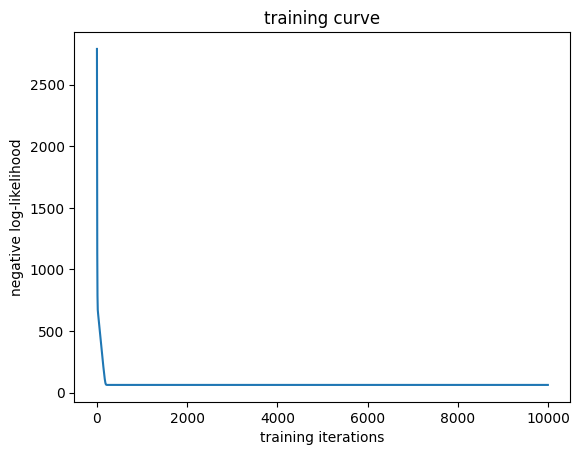

In [17]:
# TODO: Use matplotlib to plot the losses and show convergence
plt.plot(losses)
plt.ylabel("negative log-likelihood")
plt.xlabel("training iterations")
plt.title("training curve")

#### Exercise 2.2.5 (8 points)

Use the `sklearn.linear_model.LogisticRegression` model to fit the given `X` and `y`, then report the optimum values obtained from this model and compare with the result from Exercise 2.2.3.
Are the optimal value of parameters similar? If so, explain why. If not, explain what may cause the difference between your implementation and the one from sklearn.

In [18]:
# TODO: scikit-learn logistic regression

**[TODO: Write your answer here]**

## Problem 3: Gaussian Mixture Model (70 points + 10 bonus points)

In this problem, we will review a commonly used __latent variable model__ called Gaussian Mixture Model (GMM). In particular, we will focus on the property of learning this model, first from the perspective of MLE and then from the perspective of surrogate optimization, using what is known as the __Expectation Maximization (EM)__ algorithm.

### Exercise 3.1: Full Distribution of GMM (6 points)

We know that for _generative modeling_, the dataset is assumed to be generated from some probabilistic distribution, and the goal of GMM is to estimate the underlying distribution of the dataset. Here the assumption is implicitly that the data is generated by a probability distribution smooth enough, such that we can estimate its probability density function (pdf). Hence the terminology for this task is known as __density estimation__. A straightforward application of density estimation is the task of __clustering__, e.g., determining the possible __modes__ of the probability density function (each cluster center can be seen as the mode of a pdf). Therefore, from this perspective, we can make the following observations about K-Means and GMM:

- K-Means is an algorithm that targets the task of clustering specifically, while GMM is more powerful in that it deals with density estimation, and by this virtue it can also be used for clustering.
- In the context of clustering, GMM assigns data points _softly_, that is, with some probability, to a cluster, whereas K-means provides _hard assignments_ of elements to clusters.

Suppose that the dataset contains $n$ elements $\{x_1, \cdots, x_N\}$ and we assume $k$ cluster centers (or distribution modes). Now we take a look at the generative modeling story that GMM is telling: as a latent variable model, each observed data point $\mathbf{x}_i$ is associated with two random variables $Z_i, X_i$, such that $P_{X_i,Z_i} = P_{Z_i}P_{X_i\mid Z_i}$ where:


- $Z_i \sim Cat(\pi_1, \cdots, \pi_k)$, where $k$ represents $k$ pdf modes (clusters) and $\sum_{j=1}^k \pi_j = 1$; this random variable is quantifies the event \{$\mathbf{x}_i$ belongs to cluster $j$\}, and $P(Z_j = i) = \pi_i$.

Now comes the trickier bit, where we specify a __conditional distribution__ $X_i\mid Z_i=j$. This means __after observing that $\mathbf{x}_i$ is in cluster $j$, what is the distribution of $x_i$?__. The GMM assumes this follows a Gaussian with mean and variance determined by the clsuter $j$:

- $X_i\mid Z_i = j \sim \mathcal{N}(\mu_j, \Sigma_j)$, where the index $j \in \{1,\cdots, N\}$ and index $j\in\{1,\cdots, k\}$. We can see that each random variable $X_i\mid Z_i=j$ is distributed as a Gaussian, whose parameters are determined by the cluster it belongs to.

The plate diagram for this _Probabilistic Graphical Model_ is given below, where the empty circle represents the latent variable (since we cannot observe the clusters a priori).

![](bishop-gaussian-mixture.png)

This plate diagram tells us that there are in total $2N$ random variables, two for each observed data point. It also allows us to write down the joint density function, where again we have the i.i.d assumption of each random variable pair $(X_i,Z_i)$ and we denote the full joint distribution as $P_{XZ}$ (and the full joint pdf as $f_{XZ}$) and the individual joint distribution to be $P_{X_iZ_i}$(and the individual joint pdf to be $f_{X_iZ_i}$):

$$
f_{X_iZ_i}(\mathbf{\mathbf{x}_i}, k) = P(Z_i = k) f_{X}(\mathbf{x_i} \mid \mu_k, \Sigma_k) = \pi_k \mathcal{N}(\mathbf{x}; \mu_k, \Sigma_k)
$$


__Please strictly follow the notation used in this notebook, as your true understanding of the model should not change with a change of notation__!

#### Exercise 3.1.1 (3 points)

Write down the full derivation of the joint density function $f_{XZ}$ from the formula above.

(Hint: Write down the correct pdf for each random variable, then use the assumption of i.i.d to factorize it. Note that $\mathbf{x}_i \in \mathbb{R}^d$.)

**[TODO: Write your answer here]**

#### Exercise 3.1.2 (3 points)

Write down the formula for the marginal joint pdf of $f_X$ using the result from Exercise 3.1.1, where $X$ is the collection of random variables $X_1,\cdots, X_N$.

**[TODO: Write your answer here]**

### Exercise 3.2: MLE and EM algorithm for GMM (9 points + 10 bonus points)

#### Exercise 3.2.1 (5 points)

After obtaining the joint PDF, we now can derive the negative log-likelihood function of the joint pdf. write down the formula for the negative log-likelihood for random variable $X = (X_1,.\cdots, X_N)$. Then answer the following: why is doing a vanilla MLE for GMM difficult?

(Hint: It is okay to Google this, but you need to write down the analytical form of the negative log-likelihood and then say something about it.
You may want to read Section 9.2.1 from Christopher Bishop's [_Pattern Recognition and Machine Leanrning_](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).)

**[TODO: Write your answer here]**

#### Exercise 3.2.2 (4 points)

Write down the EM algorithm for GMM (i.e. write down the 4 steps).

**[TODO: Write your answer here]**

#### Exercise 3.2.3 (10 bonus points)
Prove that the EM algorithm guarantees monotonic increase in the log-likelihood using the following theorem (or any version of it, by providing your source citation).

__Theorem (Jensen's Inequality)__: If $f:\mathbb{R}\rightarrow \mathbb{R}$ is a concave function, then for any $x_1,\cdots, x_k$, and any $\lambda_1,\cdots, \lambda_k \geq 0$, and $\sum_{i=1}^k \lambda_k = 1$, the following inequality holds:
$$
\sum_{j=1}^m \lambda_j f(a_j) \leq f\left( \sum_{j=1}^m \lambda_j a_j \right)
$$

__Hints__:
- Is the logarithm function a concave function?
- You may want to checkout the general case of EM algorithm monotonicity [here](https://www.cs.cmu.edu/~epxing/Class/10708-17/notes-17/10708-scribe-lecture8.pdf). Think about the special case of GMM.

**[TODO: Write your answer here]**

### Exercise 3.3: EM vs. GD on Convergence (55 points)

In this numerical experiment, we study and compare two cases:
1. GMM trained using MLE, with gradient descent;
2. GMM trained using EM algorithm.

We compare these two scenarios' convergence behavior and their overall optimization performance. In particular, we:
1. Provide randomzied initial values for the model parameters;
2. (Exercise 3.3.1) Ask you to implement the objective / loss function, the negative-log-likelihood;
3. (Exercise 3.3.2) Ask you to call optimization algorithm from sklearn to minimize this objective;
4. (Exercise 3.3.3) Implement EM algorithm to optimize the objective;
5. (Exercise 3.3.4) Observe the convergence behavior in Exercises 3.1.2 and 3.1.3.

#### Exercise 3.3.1: GMM with MLE (10 points)

In this case, we generate some random data, then ask you to implement the objective function (__log-likelihood__). In this case we use the positive, since EM algorithm is maximizing the log-likelihood, rather than minimizing the negative log-likelihood.

In [19]:
# Data generation
np.random.seed(1234)
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

# Model parameters
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)
data = np.vstack(data)

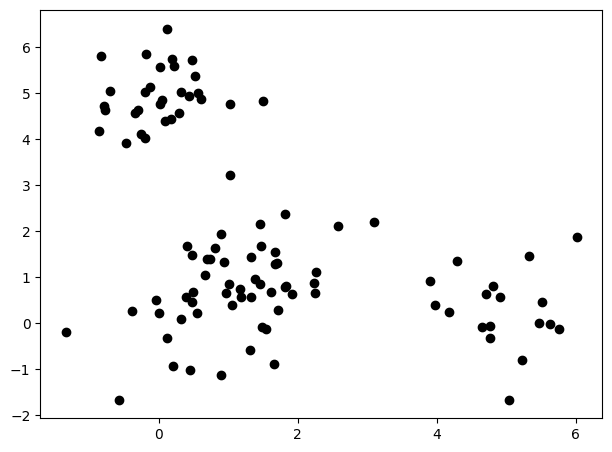

In [20]:
# Visualize data
plt.plot(data[:,0], data[:,1], 'ko')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [21]:
# Initial setup for parameters: `pi`, `mu`, `Sigma` for GMM
class Theta(object):
    pi = np.empty((0,3))
    mu = np.empty((0,3,2))
    Sigma = np.empty((0,3,2,2))

    def __init__(self, pi, mu, Sigma):
        self.pi = pi
        self.mu = mu
        self.Sigma = Sigma

theta_old = Theta(
    pi=np.array([0.4, 0.3, 0.3]),
    mu=np.array([
        [0.0, 0.0],
        [3.0, 1.0],
        [4.0, 3.0]
    ]),
    Sigma=np.array([
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]]
    ])
)

In [22]:
# TODO: implement the objective function, negative log-likelihood, given theta and data x
def GMM_objective(theta, x=data):
    """
    `theta`: theta class above
    `x`: input data of shape (n,d)
    Return the negative log-likelihood of GMM
    """
    return


#### Exercise 3.3.2: Optimize the Objective Directly (15 points)

In this case we ask you to implement a simple __gradient ascent__ algorithm to maximize the log-likelihood function implemented in Exercise 3.3.1.
To do that, you need to implement the gradient of the objective, then update using the standard gradient ascent (not descent, since we are maximizing the objective).

In [23]:
def GMM_objective_grad(theta, x=data):
    # TODO: calculate and return the gradient of GMM objective w.r.t `pi`, `mu`, `Sigma`
    pass

In [24]:
def GMM_gradient_ascent(theta, n_iters=500, x=data):
    """
    TODO:
    Call the above two functions to maximize the objective.
    Return the updated parameters and the historical record of objective.
    """
    return theta, []

#### Exercise 3.3.3: GMM with EM (20 points)

The EM algorithm does not directly deal with the objective function, but instead work on a surrogate. This general line of approach of optimziation for probabilistic models is known as __variational inference__. Now implement the steps of EM algorithm for GMM. Then run the EM algorithm for 500 iterations to obtain the model parameters.

In [25]:
def E_step(theta, data):
    """
    TODO: implement the E-step of the EM algorithm.
    Return the updated `theta`.
    """
    return

In [26]:
def M_step(theta, data):
    """
    TODO: implement the M-step of the EM algorithm.
    Return the updated `theta`.
    """
    return

In [27]:
def EM(theta, data, n_iter=500):
    """
    TODO: implement the EM algorithm.
    Be sure to call the above two functions `E_step` and `M_step`.
    `theta` is the `Theta` class above; `data` is the `data` above.
    Return the updated `theta` values and the historical record of objective.
    """
    return theta, []

#### Exercise 3.3.4 (10 points)

Based on the saved intermediate values of log-likelihood for the values above, plot and observe the behavior of log-likelihood in each case.
Summarize your observations. This execrise is open-ended.

In [28]:
# TODO: Plot the intermediate values of log-likelihood in each case

**[TODO: Write your answer here]**